In [4]:
# import necessary libraries

import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data Preparation and Cleaning ###

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# cheking duplicate rows
df.duplicated().sum()

0

In [8]:
# chec for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# dropping unnecessary columns for insignificant impact on price prediction and data privacy reasons

df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [12]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Explatory Data Analysis ###

In [13]:
# describe the data
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


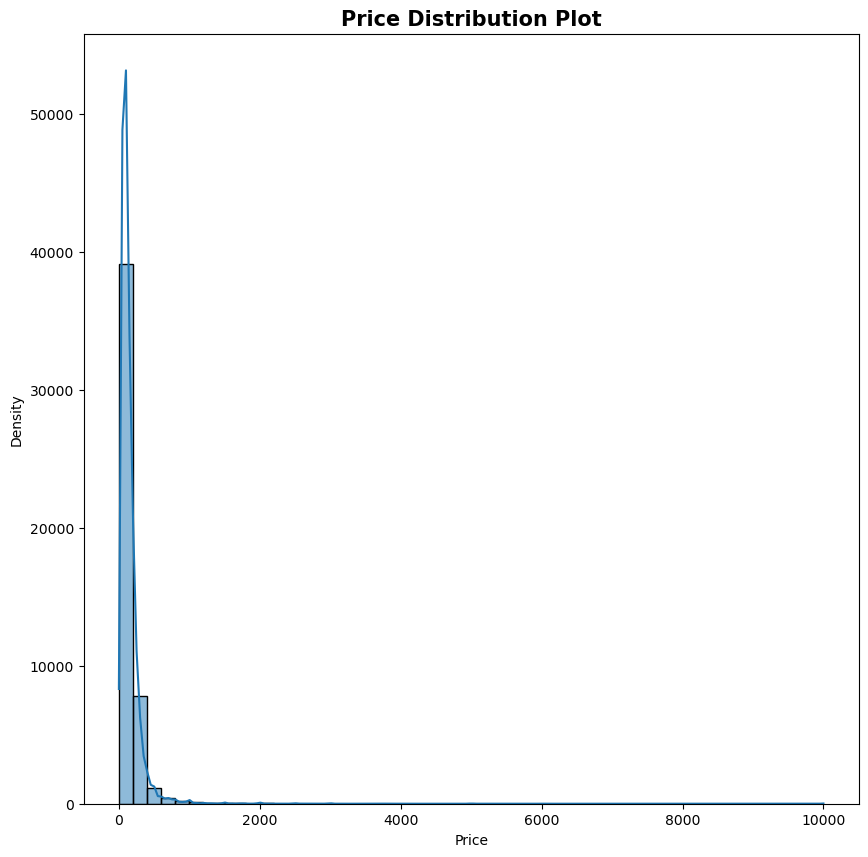

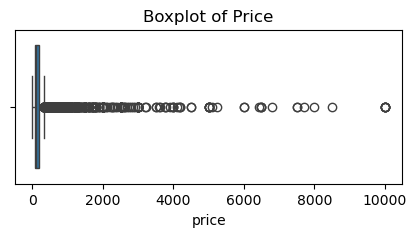

In [14]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution Plot",size=15, weight='bold')
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# Boxplot to check for long tail
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

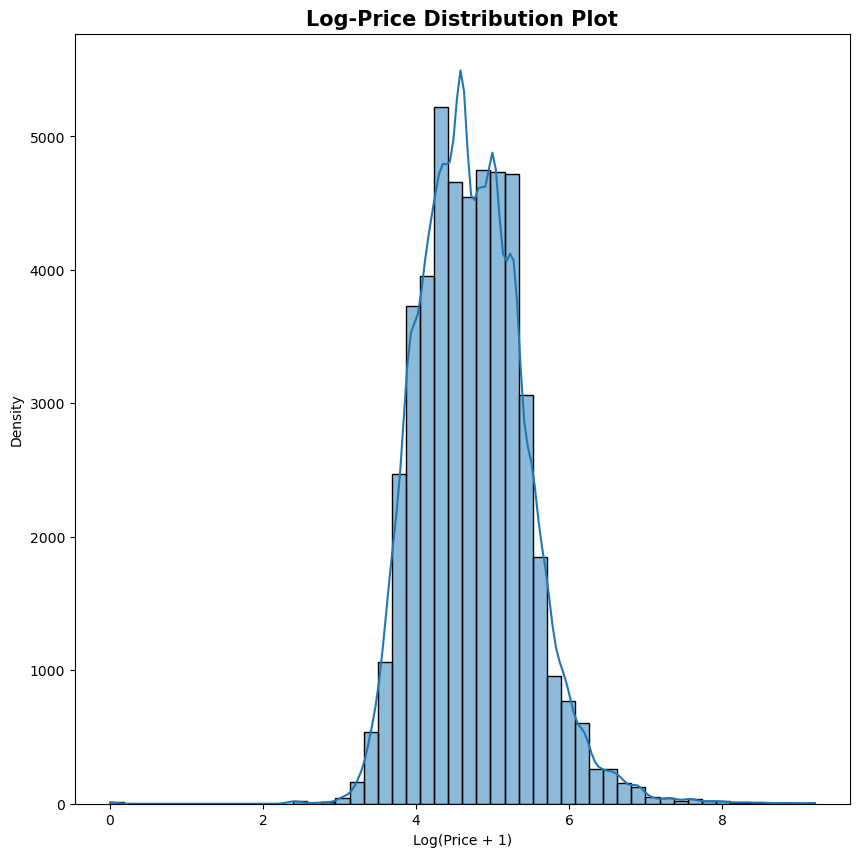

In [15]:
# Log-Price Distribution Plot
plt.figure(figsize=(10,10))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
plt.xlabel("Log(Price + 1)")
plt.ylabel("Density")
plt.show()

In [16]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

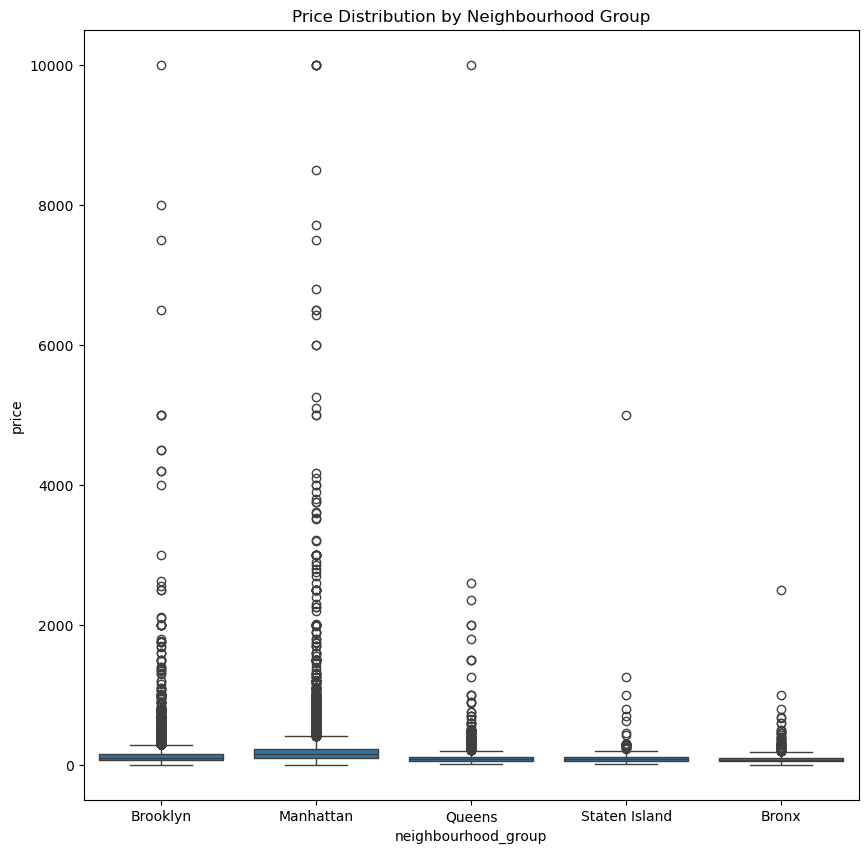

In [17]:
# relationship between price and neighbourhood group
# resize to make the price scale more visible
plt.figure(figsize=(10,10))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

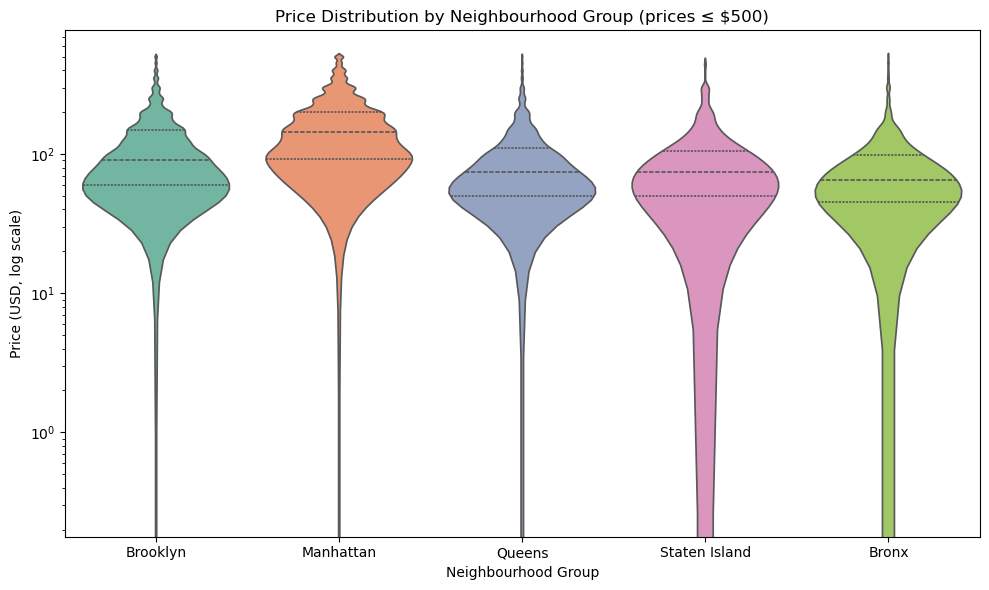

In [18]:
# Violin plot: price distribution by neighbourhood_group
# We cap extreme prices for clearer visualization and use a hue to assign distinct colors.
df_filtered = df[df['price'] <= 500]  # adjust cap as needed

plt.figure(figsize=(10,6))
ax = sns.violinplot(
    x='neighbourhood_group',
    y='price',
    data=df_filtered,
    hue='neighbourhood_group',   # different colors per group
    dodge=False,                 # avoid splitting since x already separates groups
    palette='Set2',
    inner='quartile'
)
# remove duplicate legend created by hue
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.yscale('log')  # optional: use log scale to reduce skew from high-priced outliers
plt.title('Price Distribution by Neighbourhood Group (prices ≤ $500)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD, log scale)')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

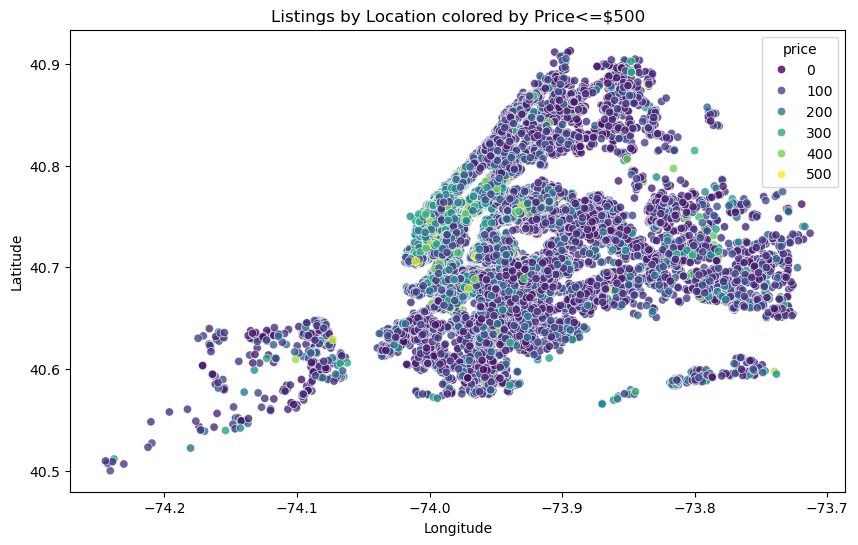

In [20]:
plt.figure(figsize=(10,6))
# use keyword arguments so seaborn knows which columns are x/y and which dataframe to use
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_filtered, alpha=0.8, palette='viridis')
plt.title('Listings by Location colored by Price<=$500')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This visualization provides useful geographic context:

Price is strongly tied to location, with NYC’s most expensive zones clearly lit up.

Manhattan dominates the high-price segment, while outer boroughs contain more lower-cost listings.

Spatial clustering is evident and could be leveraged for:

Pricing models

Neighborhood segmentation

Predictive modeling

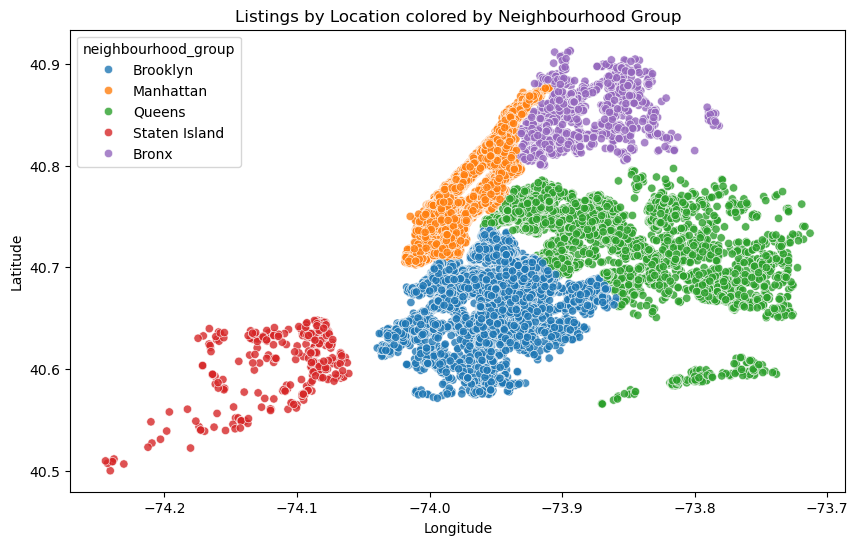

In [21]:
plt.figure(figsize=(10,6))
# use keyword arguments so seaborn knows which columns are x/y and which dataframe to use
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.8)
plt.title('Listings by Location colored by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

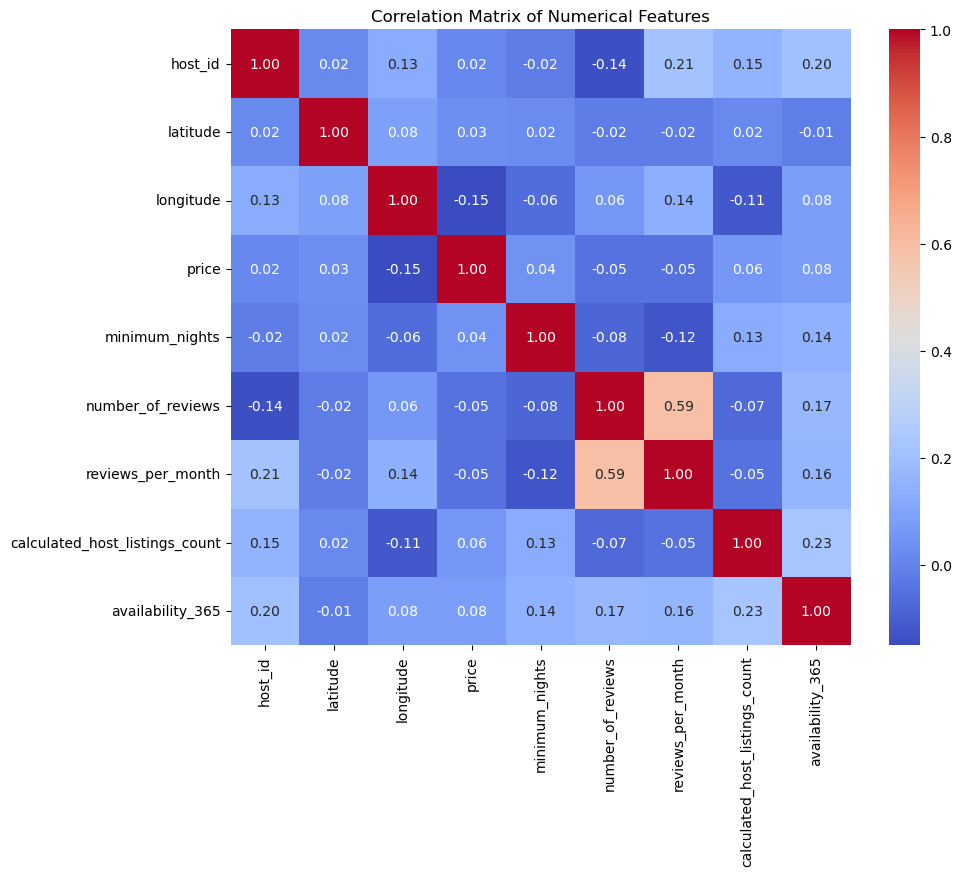

In [22]:
# Correlation Matrix between Numerical Features
plt.figure(figsize=(10,8))
# select only numeric columns to avoid conversion errors from object columns (e.g., neighbourhood names)
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The heatmap reveals that most numerical features are only weakly correlated, except for the relationship between number_of_reviews and reviews_per_month. This implies:

Predictive modeling for price or availability may require nonlinear approaches or additional features.

Review-related variables are highly interconnected, likely reflecting guest activity patterns.

### Further Pre-processing and Data Encoding ###

In [23]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [24]:
df.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
df.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [25]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type'])]:
        df[column] = df[column].factorize()[0]

df_new = Encode(df)

In [26]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


## Modelling ##

In [27]:
from sklearn.model_selection import train_test_split
 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = (df_train.price).values
y_val = (df_val.price).values
y_test = (df_test.price).values


y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

### Linear Regression ###

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import root_mean_squared_error

In [29]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(df_train,lab_enc.fit_transform(y_train))

ExtraTreesClassifier(n_estimators=50)

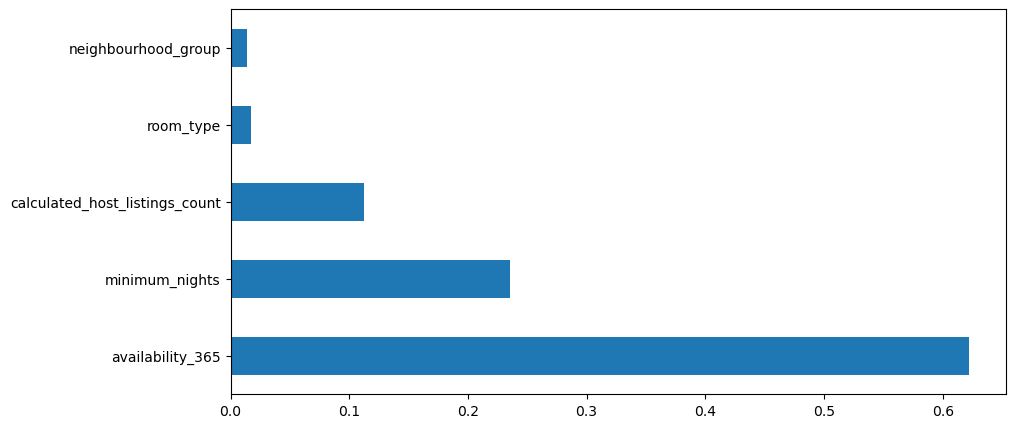

In [31]:
plt.figure(figsize=(10,5))
feat_importances = pd.Series(feature_model.feature_importances_, index=df_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [32]:
# Linear model 1: Building the model with all features

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_train, y_train)
y_pred = lr.predict(df_val)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("RMSE on validation set:", rmse)

RMSE on validation set: 0.6118623257363902


In [33]:
# features to use without the less important features

base = [ "minimum_nights", "calculated_host_listings_count", "availability_365"]

In [34]:
# build linear regression using only features from `base`
features = [f for f in base if f in df_train.columns]
if not features:
    raise ValueError("No features from 'base' are present in df_train.")

lr_base = LinearRegression()
lr_base.fit(df_train[features], y_train)

y_pred_val_base = lr_base.predict(df_val[features])
mse_base = mean_squared_error(y_val, y_pred_val_base)
rmse_base = np.sqrt(mse_base)

print("Features used:", features)
print("Validation RMSE (log-price):", rmse_base)

# evaluate on test set if available
if 'df_test' in globals() and set(features).issubset(df_test.columns):
    y_pred_test_base = lr_base.predict(df_test[features])
    mse_test_base = mean_squared_error(y_test, y_pred_test_base)
    rmse_test_base = np.sqrt(mse_test_base)
    print("Test RMSE (log-price):", rmse_test_base)

Features used: ['minimum_nights', 'calculated_host_listings_count', 'availability_365']
Validation RMSE (log-price): 0.6950046920751153
Test RMSE (log-price): 0.6756279248090037


In [35]:
base = [ "minimum_nights", "calculated_host_listings_count", "availability_365", "room_type", "neighbourhood_group"]

In [36]:
# function to prepare X matrix

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
# linear regression with regularization

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [38]:
X_train = prepare_X(df_train)

In [ ]:
# selection of regularization parameter "r"

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.001, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    #print('%6s' %r, rmse(y_val, y_pred))
    print('%6s' %r, round(root_mean_squared_error(y_val, y_pred), 4))

     0 0.6119
 0.001 0.6119
     1 0.6119
    10 0.6118
   100 0.6119


#### Final Model ####

In [40]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w_0 + X_train.dot(w)
print('train', root_mean_squared_error(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(root_mean_squared_error(y_val, y_pred), 2))

train 0.6102877890852703
val 0.61


### Descision Tree Regressor ###

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.fillna(0).to_dict(orient='records')
val_dicts = df_val.fillna(0).to_dict(orient='records')
test_dicts = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [42]:
dv.get_feature_names_out()

array(['availability_365', 'calculated_host_listings_count',
       'minimum_nights', 'neighbourhood_group', 'room_type'], dtype=object)

In [43]:
# decision tree with max_depth=1 regression

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
print('train', rmse)

train 0.5758213513979085


In [44]:
y_pred = dt.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print('val', rmse)

val 0.5757549937335621


In [45]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict(X_val)
    auc = root_mean_squared_error(y_val, y_pred)
     
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.576
   2 -> 0.542
   3 -> 0.525
   4 -> 0.511
   5 -> 0.502
   6 -> 0.497
  10 -> 0.495
  15 -> 0.523
  20 -> 0.560
None -> 0.576


In [46]:
scores = []
 
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict(X_val)
        auc = root_mean_squared_error(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,rmse
0,4,1,0.578709
1,4,2,0.544412
2,4,5,0.510925
3,4,10,0.498704
4,4,15,0.493966


In [47]:
df_scores.sort_values(by='rmse', ascending=True).head()

,max_depth,min_samples_leaf,rmse
24,6,100,0.492400
6,4,100,0.492400
15,5,100,0.492400
23,6,20,0.492656
5,4,20,0.492656


In [48]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse              
max_depth             4      5      6
min_samples_leaf                     
1                 0.579  0.579  0.579
2                 0.544  0.544  0.543
5                 0.511  0.511  0.511
10                0.499  0.499  0.499
15                0.494  0.494  0.494
20                0.493  0.493  0.493
100               0.492  0.492  0.492
200               0.494  0.494  0.494
500               0.500  0.500  0.500

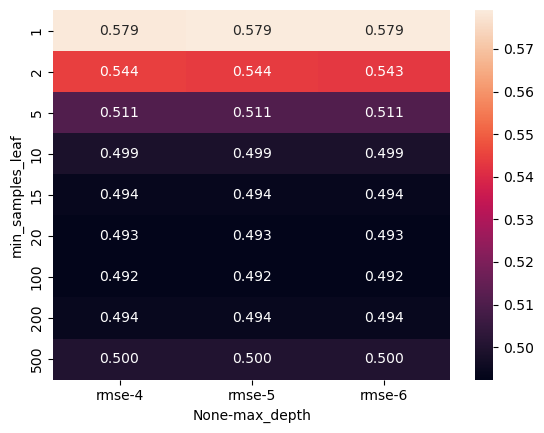

In [49]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")
plt.show()

#### Final Model ####

In [50]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)

In [51]:
y_pred_dt = dt.predict(X_val)
root_mean_squared_error(y_val, y_pred_dt)

0.4961658354209349

### Random Forest Regressor ###

In [55]:
from sklearn.ensemble import RandomForestRegressor
 
# n_estimators - number of models we want to use
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [56]:
y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.5178421484447623

In [57]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
     
    scores.append((n, rmse))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.519183
1,20,0.514817
2,30,0.512782
3,40,0.512561
4,50,0.512226
5,60,0.511712
6,70,0.511736
7,80,0.511597
8,90,0.511541
9,100,0.511341


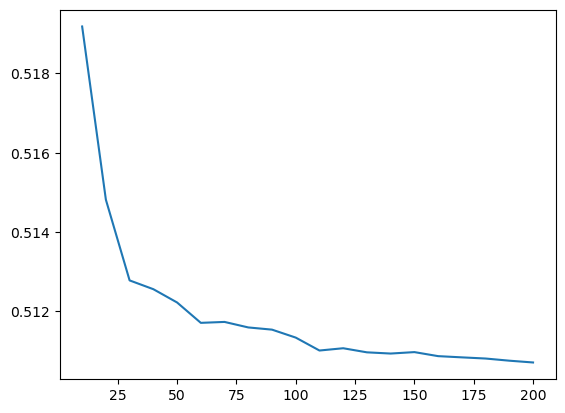

In [58]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

In [59]:
scores = []
 
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1
                                    , n_jobs=-1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
 
        scores.append((d, n, rmse))
 
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,5,10,0.499292
1,5,20,0.499428
2,5,30,0.499078
3,5,40,0.499210
4,5,50,0.499040


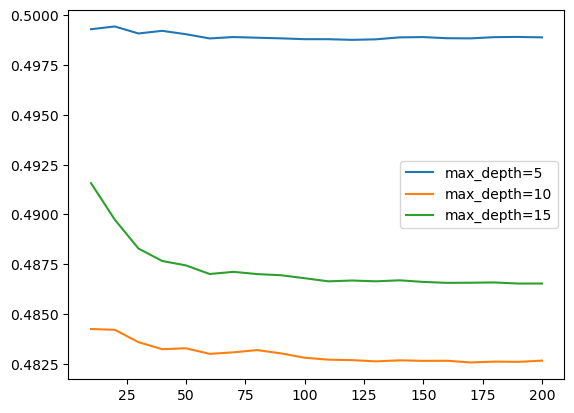

In [60]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)
 
plt.legend()
plt.show()

In [61]:
max_depth = 10

scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
 
        scores.append((s, n, rmse))
 
columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [62]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

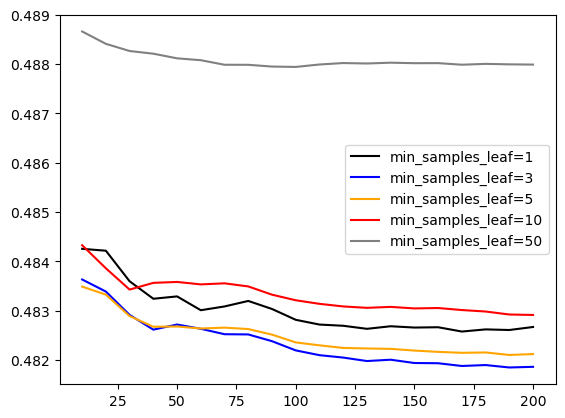

In [63]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()
plt.show()

#### Final Model ####

In [64]:
min_samples_leaf = 3
max_depth = 10

In [65]:
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=200,
                      n_jobs=-1, random_state=1)

In [66]:
y_pred_rf = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred_rf)

0.48186025153273015

### Gradient Boosting and XGBoost ##

In [71]:
import xgboost as xgb

In [97]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [99]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [101]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    # use a regression objective because target is continuous (log-price)
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

[0]	train-rmse:0.60173	val-rmse:0.60656
[1]	train-rmse:0.54860	val-rmse:0.55297
[2]	train-rmse:0.51926	val-rmse:0.52332
[3]	train-rmse:0.50327	val-rmse:0.50771
[4]	train-rmse:0.49394	val-rmse:0.49928
[5]	train-rmse:0.48800	val-rmse:0.49379
[6]	train-rmse:0.48417	val-rmse:0.49028
[7]	train-rmse:0.48173	val-rmse:0.48812
[8]	train-rmse:0.47981	val-rmse:0.48653
[9]	train-rmse:0.47861	val-rmse:0.48562
[10]	train-rmse:0.47720	val-rmse:0.48464
[11]	train-rmse:0.47564	val-rmse:0.48387
[12]	train-rmse:0.47464	val-rmse:0.48327
[13]	train-rmse:0.47367	val-rmse:0.48281
[14]	train-rmse:0.47288	val-rmse:0.48226
[15]	train-rmse:0.47116	val-rmse:0.48117
[16]	train-rmse:0.47056	val-rmse:0.48086
[17]	train-rmse:0.46948	val-rmse:0.48056
[18]	train-rmse:0.46889	val-rmse:0.48040
[19]	train-rmse:0.46849	val-rmse:0.48050
[20]	train-rmse:0.46787	val-rmse:0.48033
[21]	train-rmse:0.46743	val-rmse:0.48029
[22]	train-rmse:0.46641	val-rmse:0.47997
[23]	train-rmse:0.46606	val-rmse:0.47986
[24]	train-rmse:0.46573	va

In [102]:
y_pred = model.predict(dval)
#y_pred[:10]
root_mean_squared_error(y_val, y_pred)

0.4814788404242702

In [103]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [104]:
scores = {}

In [105]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [106]:
'eta=%s' % (xgb_params['eta'])

'eta=0.3'

In [107]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [108]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [109]:
'eta=%s' % (xgb_params['eta'])

'eta=0.1'

In [110]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [111]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [112]:
'eta=%s' % (xgb_params['eta'])

'eta=0.05'

In [113]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [114]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [115]:
'eta=%s' % (xgb_params['eta'])

'eta=0.01'

In [116]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

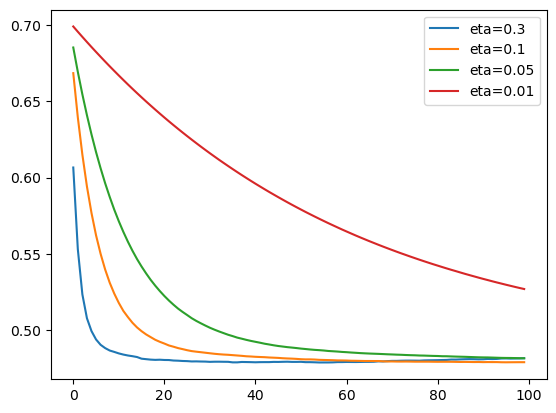

In [ ]:
# Best eta is 0.1

for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.show()

In [120]:
scores = {}

In [122]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [123]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [124]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [125]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [126]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [127]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [128]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [129]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

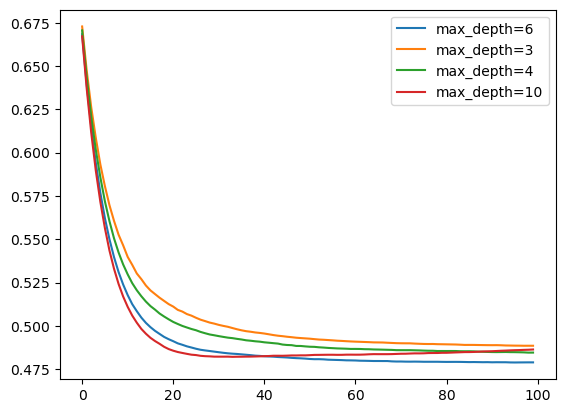

In [ ]:
# Best max_depth is 6

for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()
plt.show()

In [132]:
scores = {}

In [133]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [134]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [135]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 10,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [136]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [137]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 30,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [138]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

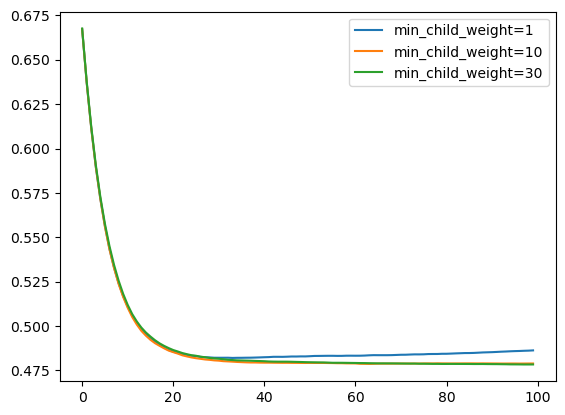

In [ ]:
# Best min_child 10

for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.legend()
plt.show()

In [165]:
y_pred_xgb = model.predict(dval)
root_mean_squared_error(y_val, y_pred_xgb)

0.4785273627567061

### Model Comparison ###

In [166]:
xgb_rmse = 0.4785273627567061
rf_rmse = 0.48186025153273015
dt_rmse = 0.4961658354209349 
lr_rmse = 0.6118623257363902

In [167]:
lr_value = globals().get('lr_rmse', globals().get('lr_remse', None))

results = {
    'xgboost': xgb_rmse,
    'random_forest': rf_rmse,
    'decision_tree': dt_rmse,
    'linear_regression': lr_value
}

df_results = pd.DataFrame(list(results.items()), columns=['model', 'rmse'])
df_results = df_results.sort_values('rmse', ascending=True).reset_index(drop=True)
df_results

,model,rmse
0,xgboost,0.478527
1,random_forest,0.481860
2,decision_tree,0.496166
3,linear_regression,0.611862


/var/folders/qn/29v95ds979s3ttnb624zvcfw0000gn/T/ipykernel_39826/3924352809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='model', y='rmse', data=df_plot, palette=bar_colors)


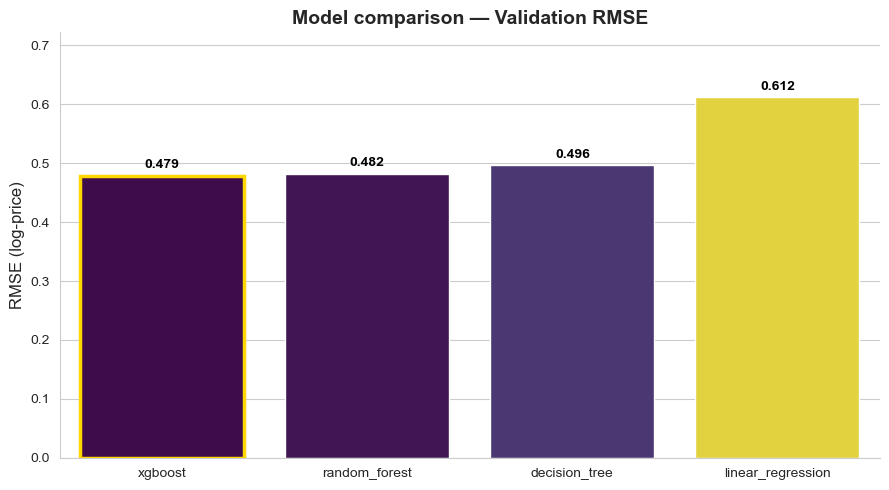

In [168]:
# Colorful bar plot for df_results
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

# prepare data (best first)
df_plot = df_results.sort_values('rmse', ascending=True).reset_index(drop=True)

# create a color for each bar using a colormap mapped to RMSE
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(df_plot['rmse'].min(), df_plot['rmse'].max())
bar_colors = [cmap(norm(v)) for v in df_plot['rmse']]

ax = sns.barplot(x='model', y='rmse', data=df_plot, palette=bar_colors)

# annotate bars with RMSE values and highlight the best model
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.008,
            f"{height:.3f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)
    if i == 0:  # best (lowest) RMSE after sorting
        p.set_edgecolor('gold')
        p.set_linewidth(2.5)

ax.set_title('Model comparison — Validation RMSE', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('RMSE (log-price)', fontsize=12)
plt.ylim(0, df_plot['rmse'].max() * 1.18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

#### Using the best model to predict with test data ####

In [72]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_full_train = (df_full_train.price).values
y_test = (df_test.price).values


y_full_train = np.log1p(df_full_train.price.values)
y_test = np.log1p(df_test.price.values)

del df_full_train['price']
del df_test['price']


In [73]:
full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

In [74]:
features = list(dv.get_feature_names_out())

In [75]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [76]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 

In [77]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=100)
y_pred = model.predict(dtest)
print(root_mean_squared_error(y_test, y_pred))

0.4817879664100053


### Feature Importance ###

#### Descision Trees ####

In [52]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)

In [53]:
df_importance = df_importance[df_importance.gain > 0]

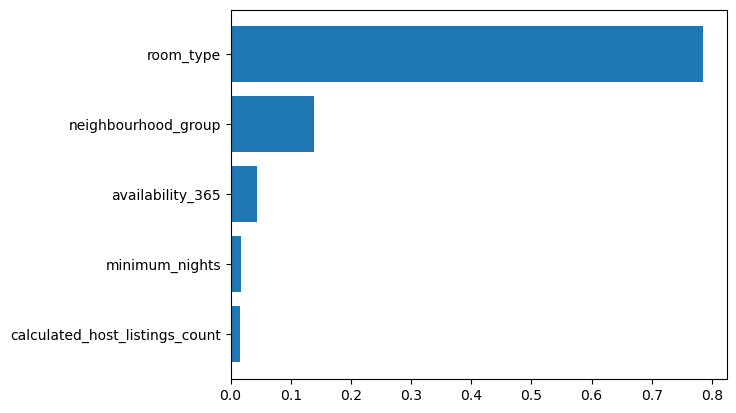

In [54]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

#### Random Forest ####

In [68]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)

In [69]:
df_importance = df_importance[df_importance.gain > 0.01]

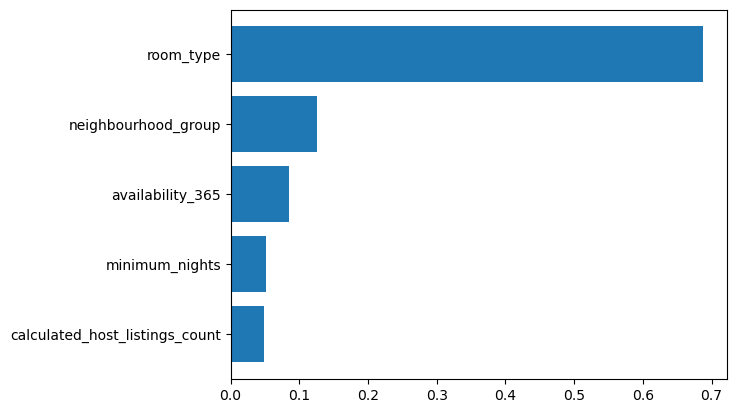

In [70]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

#### XGBoost ####

In [78]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('room_type', 231.27308654785156),
 ('neighbourhood_group', 15.437272071838379),
 ('calculated_host_listings_count', 2.55146861076355),
 ('availability_365', 2.3989782333374023),
 ('minimum_nights', 2.1947317123413086)]

In [79]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('availability_365', 1613.0),
 ('calculated_host_listings_count', 1128.0),
 ('minimum_nights', 1099.0),
 ('neighbourhood_group', 458.0),
 ('room_type', 168.0)]

In [80]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

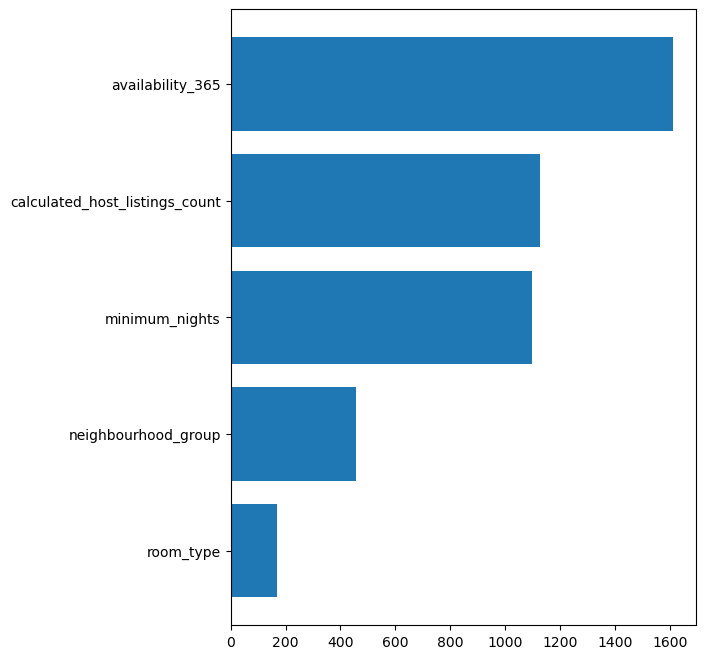

In [81]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()